In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib

import sys
sys.path.append("../")
from samplers import memory_mnist, memory_fashion
from utils import expspace


In [2]:
from utils import expspace

In [3]:
def calculate_coeff(data, min_i, max_i, log=False, plot=False, show=False):
    data = np.array(data)
    data_clean = data[np.all(~np.isnan(data), axis=1)]
    ind_sort = np.argsort(data_clean[:,0])
    data_clean = data_clean[ind_sort]
    d, ll = tuple(zip(*data_clean))

    d = d[min_i:max_i]
    ll = ll[min_i:max_i]

    d = np.array(d).reshape(-1,1)
    ll = np.array(ll)
#     print(d)
    
    if log:
        d = np.log(d)
#     regr = linear_model.TheilSenRegressor()
    regr = linear_model.LinearRegression()
    regr.fit(d, ll)
    ll_pred = regr.predict(d)

    if plot:
        plt.plot(d, regr.predict(d), label="prediction", c='r', alpha=0.5)
        plt.plot(d, ll, 'o-', alpha=0.5)
    if show:
        plt.show()
        
    return regr.coef_[0]


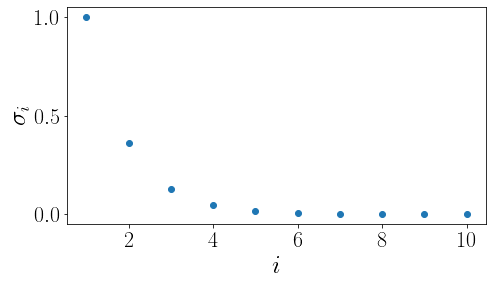

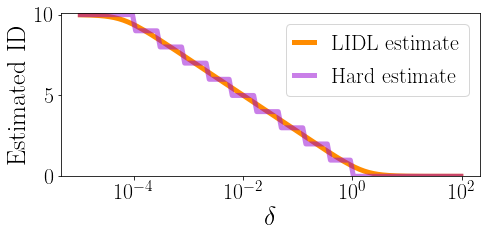

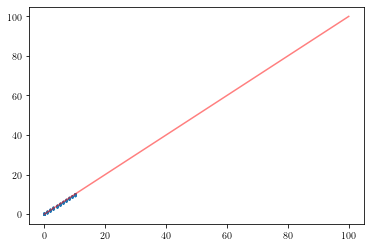

In [7]:
sigma = expspace(1, 0.0001, 10)
matplotlib.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
label_size = 26
ticks_size = 22
legend_size = 22
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
plt.scatter(range(1,11), sigma)
ax.tick_params(labelsize=ticks_size)
# ax.legend(loc=2, fontsize=legend_size, handlelength=0.9)
ax.set_xlabel("$i$", size=label_size)
ax.set_ylabel("$\sigma_i$", size=label_size)
plt.show()

n_pixel = len(sigma)

to_plot = []
delta_dim  = []
for delta in expspace(0.00001, 100, 250):
    sigma = np.array(sigma)
    delta_arr = np.ones(sigma.shape[0]) * delta
    to_plot.append([delta, np.log(sigma**2 + delta_arr **2).sum()/2])
    delta_dim.append((sigma > delta).sum())
to_plot = np.array(to_plot)
delta_dim = np.array(delta_dim)

length = 2

dims = []
for i in range(0, len(to_plot)-length+1):
    coef = calculate_coeff(to_plot, i, i + length, log=True, plot=False)
    dims.append(n_pixel - coef)
    
fig, ax = plt.subplots(1, 1, figsize=(7.5, 3))
plt.plot((to_plot[:-1, 0] + to_plot[1:, 0])/2, dims, label="LIDL estimate", linewidth=5, c='darkorange')
plt.plot((to_plot[:-1, 0] + to_plot[1:, 0])/2, (delta_dim[:-1] + delta_dim[1:])/2, alpha=0.5, linewidth=5,
         label="Hard estimate", c='darkviolet')
plt.xscale('log')
plt.ylim(0, np.max(dims) * 1.01);
ax.tick_params(labelsize=ticks_size)
ax.legend(loc=1, fontsize=legend_size, handlelength=0.9)
ax.set_xlabel("$\delta$", size=label_size)
ax.set_ylabel("Estimated ID", size=label_size)

plt.show()
plt.scatter(delta_dim[:-1], dims, s=1)
plt.plot([0, 100],[0, 100], c='r', alpha=0.5)
# dims

Text(0, 0.5, 'Estimated ID')

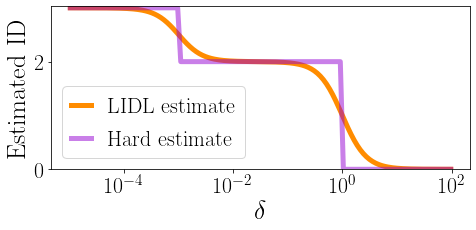

In [8]:
import matplotlib
# low = 0.0
low = 0.001
high = 1
sigma = [low] * 1 + [high] * 2

n_pixel = len(sigma)

to_plot = []
delta_dim  = []
for delta in expspace(0.00001, 100, 250):
    sigma = np.array(sigma)
    delta_arr = np.ones(sigma.shape[0]) * delta
    to_plot.append([delta, np.log(sigma**2 + delta_arr **2).sum()/2])
    delta_dim.append((sigma > delta).sum())
to_plot = np.array(to_plot)
delta_dim = np.array(delta_dim)

length = 2

dims = []
for i in range(0, len(to_plot)-length+1):
    coef = calculate_coeff(to_plot, i, i + length, log=True, plot=False)
#     print(i, i + length, n_pixel - coef)
    dims.append(n_pixel - coef)

matplotlib.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
label_size = 26
ticks_size = 22
legend_size = 22
fig, ax = plt.subplots(1, 1, figsize=(7.5, 3))

plt.plot((to_plot[:-1, 0] + to_plot[1:, 0])/2, dims, label="LIDL estimate", linewidth=5, c='darkorange')
plt.plot((to_plot[:-1, 0] + to_plot[1:, 0])/2, (delta_dim[:-1] + delta_dim[1:])/2, alpha=0.5, linewidth=5,
         label="Hard estimate", c='darkviolet')
plt.xscale('log')
plt.ylim(0, np.max(dims) * 1.01);
ax.tick_params(labelsize=ticks_size)
ax.legend(loc=3, fontsize=legend_size, handlelength=0.9)
ax.set_xlabel("$\delta$", size=label_size)
ax.set_ylabel("Estimated ID", size=label_size)
